**Dataset**
labeled datasset collected from twitter (Lab 1 - Hate Speech.tsv)

**Objective**
classify tweets containing hate speech from other tweets. <br>
0 -> no hate speech <br>
1 -> contains hate speech <br>


**Evaluation metric**
macro f1 score

### Import used libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 500)

### Load Dataset

###### Note: search how to load the data from tsv file

In [ ]:
df = pd.read_csv("/content/Hate Speech.tsv", sep= "\t", index_col='id')

In [ ]:
df.count()

,0
label,31535
tweet,31535


In [ ]:
x = df['tweet']
y = df['label']

### Data splitting

It is a good practice to split the data before EDA helps maintain the integrity of the machine learning process, prevents data leakage, simulates real-world scenarios more accurately, and ensures reliable model performance evaluation on unseen data.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, stratify=y, random_state=42)

In [ ]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of x_train: (25228,)
Shape of y_train: (25228,)


### EDA on training data

- check NaNs

In [ ]:
x_train.isnull().sum()

np.int64(0)

In [ ]:
y_train.isnull().sum()

np.int64(0)

In [ ]:
x_train.duplicated().sum()

np.int64(1795)

- show a representative sample of data texts to find out required preprocessing steps

In [ ]:
sample = x_train.sample(10)
print(sample)

id
27860                                                     it's going to be ace! @user @user @user @user @user @user @user @user
2727                                                                               i am wholesome. #i_am #positive #affirmation
9159                                                                battle of the bastards #gameofthrones #season7 #teamjonsnow
25296                                            nope!!! this is not true. data is readily available. you just have to request.
24393                                                                                       #aldubfohelove   tuesday morning!!!
27566                                       @user anyone on ubuntu and/or just running systemd-resolved beware.   #disaster â
597                                                           rare pic of superstar @user with @user    bihday sivakoratala  :)
28550    @user @user don't fall for that shit...i'm from croatia and those are just some spoiled rich

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

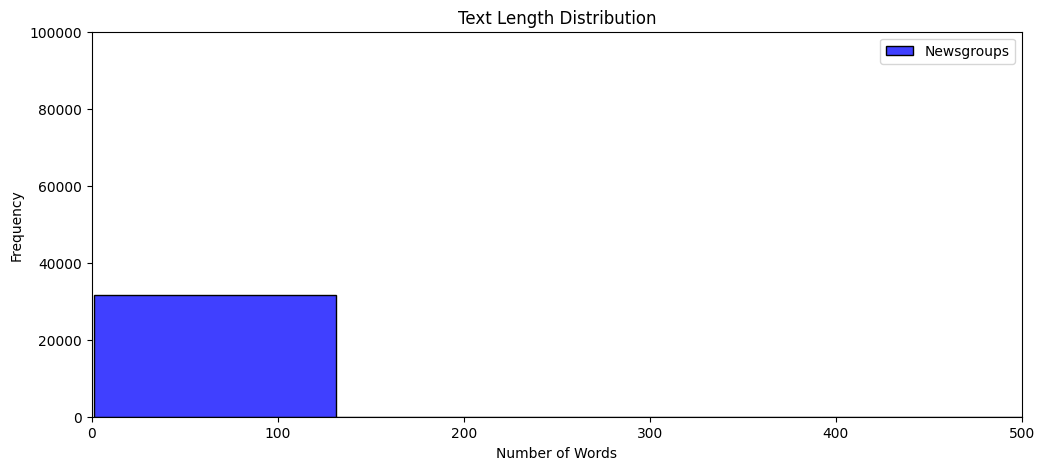

In [ ]:
# Add text length columns
text_length = x.astype(str).apply(lambda x: len(x.split()))

# Plot distribution
plt.figure(figsize=(12, 5))
sns.histplot(text_length,bins=20 ,color='blue', label='Newsgroups')
plt.ylim(0,100000)
plt.xlim(0,500)
plt.legend()
plt.title("Text Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

- check dataset balancing

In [ ]:
y_train.value_counts()

,count
label,
0,23458
1,1770


- Cleaning and Preprocessing are:
    - remove url, hash, username, punetuation, emoji
    - remove cotraction
    - remove stop words
    - lemeterzation
    - ... etc.

### Cleaning and Preprocessing

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 12.2 MB/s eta 0:00:00


In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 30.8 MB/s eta 0:00:00


In [ ]:
!pip install gensim

In [ ]:
!pip install --upgrade numpy gensim
!pip install --force-reinstall numpy
!pip install --upgrade --force-reinstall gensim

In [ ]:
import emoji
import numpy as np
from contractions import fix
import re
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
#import gensim
#from gensim.models import Word2Vec, KeyedVectors
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

In [ ]:
from nltk.stem import WordNetLemmatizer
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from nltk import pos_tag
from nltk.corpus import wordnet

In [ ]:
def clean_tweet(tweet):
    tweet = str(tweet).lower()
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'@\S+', '', tweet)
    tweet = re.sub(r'#(\S+)', r'\1', tweet)
    tweet = emoji.demojize(tweet, delimiters=(" ", " "))
    tweet = fix(tweet)
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(tweet)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatizer_word =  [lemmatizer.lemmatize(word) for word in filtered_tokens]
    cleaned_tweet = ' '.join(lemmatizer_word)
    return cleaned_tweet

In [ ]:
x_train = x_train.apply(clean_tweet)
x_test = x_test.apply(clean_tweet)

In [ ]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of x_train: (25228,)
Shape of y_train: (25228,)


## text presentations




####simple models

###### BOW

In [ ]:
vector_bow = CountVectorizer()
x_train_bow = vector_bow.fit_transform(x_train)
x_test_bow = vector_bow.transform(x_test)

In [ ]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of x_train: (25228,)
Shape of y_train: (25228,)


#####TfidVectorizor

In [ ]:
vector_TfDf = TfidfVectorizer(ngram_range=(1,1),min_df= 8)
x_train_tfdf = vector_TfDf.fit_transform(x_train)
x_test_tfdf = vector_TfDf.transform(x_test)

so using Tfid the best score is 69 lits try anther ways





### advanced models

####word2vec

In [ ]:
X_test_tokens = [text.split() for text in x_train]
word_toVec = Word2Vec(sentences=X_test_tokens, vector_size= 100,
                              window=5, min_count=1 , workers= 4)

x_train_word2vec = np.array([
    np.mean([word_toVec.wv[word] for word in text.split() if word in word_toVec.wv], axis=0)
    if any(word in word_toVec.wv for word in text.split())  # Check if any word in vocabulary
    else np.zeros(word_toVec.vector_size)  # Use zero vector if no words in vocabulary
    for text in x_train
])

x_test_word2vec = np.array([
    np.mean([word_toVec.wv[word] for word in text.split() if word in word_toVec.wv], axis=0)
    if any(word in word_toVec.wv for word in text.split())  # Check if any word in vocabulary
    else np.zeros(word_toVec.vector_size)  # Use zero vector if no words in vocabulary
    for text in x_test
])

####glove


In [ ]:
import gensim.downloader as api
glove_model = api.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
def text_to_glove(text, glove_model, vector_size):
    # Tokenize by splitting on spaces (this is the simplest tokenization)
    tokens = text.lower().split()
    vectors = [glove_model[word] for word in tokens if word in glove_model]
    if not vectors:
        return np.zeros(vector_size)
    return np.mean(vectors, axis=0)

vector_size = glove_model.vector_size

x_train_vectors = np.array([text_to_glove(text, glove_model, vector_size) for text in x_train])
x_test_vectors = np.array([text_to_glove(text, glove_model, vector_size) for text in x_test])


####fast text embedding

In [ ]:
fasttext_model = api.load("fasttext-wiki-news-subwords-300")

In [ ]:
import numpy as np
import gensim.downloader as api

def text_to_fasttext(text, fasttext_model, vector_size):
    # Tokenize by splitting on spaces (simplest form of tokenization)
    tokens = text.lower().split()
    vectors = [fasttext_model[word] for word in tokens if word in fasttext_model]
    if not vectors:
        return np.zeros(vector_size)
    return np.mean(vectors, axis=0)

vector_size = fasttext_model.vector_size


# Vectorize the training and test data
x_train_fast = np.array([text_to_fasttext(text, fasttext_model, vector_size) for text in x_train])
x_test_fast = np.array([text_to_fasttext(text, fasttext_model, vector_size) for text in x_test])



**You  are doing Great so far!**

### Modelling

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

####RNN

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
vocab_size = len(tokenizer.word_index) +1

x_train_bad = tokenizer.texts_to_sequences(x_train)
x_test_bad = tokenizer.texts_to_sequences(x_test)

max_len = 100
x_train_bad = pad_sequences(x_train_bad, maxlen=max_len)
x_test_bad = pad_sequences(x_test_bad, maxlen=max_len)

emdedding_layer = Embedding(input_dim=vocab_size, output_dim=100, input_length=max_len)

model = Sequential([
    emdedding_layer,
    SimpleRNN(64),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history1 = model.fit(x_train_bad, y_train, epochs=10, batch_size=32, validation_data=(x_test_bad, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


789/789 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9299 - loss: 0.2454 - val_accuracy: 0.9510 - val_loss: 0.1440
Epoch 2/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9853 - loss: 0.0468 - val_accuracy: 0.9632 - val_loss: 0.1264
Epoch 3/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9983 - loss: 0.0066 - val_accuracy: 0.9600 - val_loss: 0.1817
Epoch 4/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9991 - loss: 0.0025 - val_accuracy: 0.9548 - val_loss: 0.2147
Epoch 5/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9984 - loss: 0.0051 - val_accuracy: 0.9523 - val_loss: 0.2677
Epoch 6/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9994 - loss: 0.0018 - val_accuracy: 0.9469 - val_loss: 0.2692
Epoch 7/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9992 - loss: 0.0029 - val_accuracy: 0.9497 - val_loss: 0.2965
Epoch 8/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9992 - loss: 0.0030 - val_accuracy:

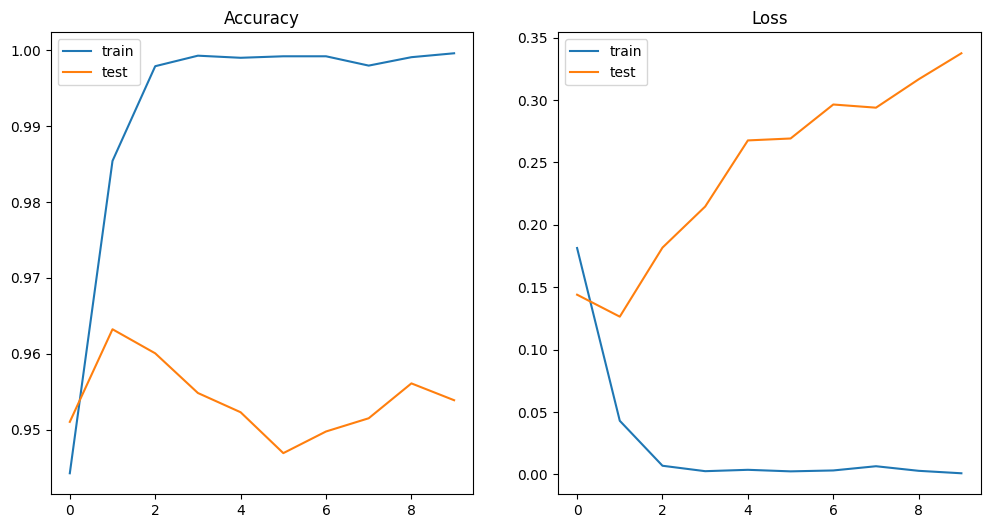

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='train')
plt.plot(history1.history['val_accuracy'], label='test')
plt.legend()
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.legend()
plt.title('Loss')
plt.show()

#####RNN with glove

In [ ]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
vocab_size = len(tokenizer.word_index) + 1

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

# Padding
max_len = 100  # Adjust based on your data analysis
X_train_pad = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

embedding_matrix = np.zeros((vocab_size, 100))  # Embedding dimension set to 100
for word, i in tokenizer.word_index.items():
    if word in glove_model:
        embedding_matrix[i] = glove_model[word]

# LSTM Model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=100,  # Reduced output dimension
        weights=[embedding_matrix],
        input_length=max_len,
        trainable=False  # Freeze embeddings
    ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train with a smaller batch size
history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=32,  # Reduced batch size
    validation_data=(X_test_pad, y_test),
    verbose=1
)

# Evaluate
test_loss, test_acc = model.evaluate(X_test_pad, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

Epoch 1/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 24s 21ms/step - accuracy: 0.9232 - loss: 0.2323 - val_accuracy: 0.9483 - val_loss: 0.1484
Epoch 2/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.9513 - loss: 0.1398 - val_accuracy: 0.9539 - val_loss: 0.1297
Epoch 3/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.9575 - loss: 0.1291 - val_accuracy: 0.9556 - val_loss: 0.1232
Epoch 4/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9643 - loss: 0.1083 - val_accuracy: 0.9572 - val_loss: 0.1393
Epoch 5/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9707 - loss: 0.0872 - val_accuracy: 0.9607 - val_loss: 0.1205
Epoch 6/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9773 - loss: 0.0676 - val_accuracy: 0.9593 - val_loss: 0.1255
Epoch 7/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9814 - loss: 0.0579 - val_accuracy: 0.9569 - val_loss: 0.1480
Epoch 8/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9865 - loss: 0.0414 - 

####RNN with different parameters

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
vocab_size = len(tokenizer.word_index) +1

x_train_bad = tokenizer.texts_to_sequences(x_train)
x_test_bad = tokenizer.texts_to_sequences(x_test)

max_len = 150
x_train_bad = pad_sequences(x_train_bad, maxlen=max_len)
x_test_bad = pad_sequences(x_test_bad, maxlen=max_len)

emdedding_layer = Embedding(input_dim=vocab_size, output_dim=100, input_length=max_len)

model2 = Sequential([
    emdedding_layer,
    SimpleRNN(64),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history2 = model2.fit(x_train_bad, y_train, epochs=5, batch_size=16, validation_data=(x_test_bad, y_test))

Epoch 1/5
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - accuracy: 0.9297 - loss: 0.2352 - val_accuracy: 0.9561 - val_loss: 0.1477
Epoch 2/5
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9780 - loss: 0.0665 - val_accuracy: 0.9640 - val_loss: 0.1368
Epoch 3/5
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9919 - loss: 0.0239 - val_accuracy: 0.9586 - val_loss: 0.1917
Epoch 4/5
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9973 - loss: 0.0094 - val_accuracy: 0.9586 - val_loss: 0.3118
Epoch 5/5
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9985 - loss: 0.0045 - val_accuracy: 0.9577 - val_loss: 0.3102


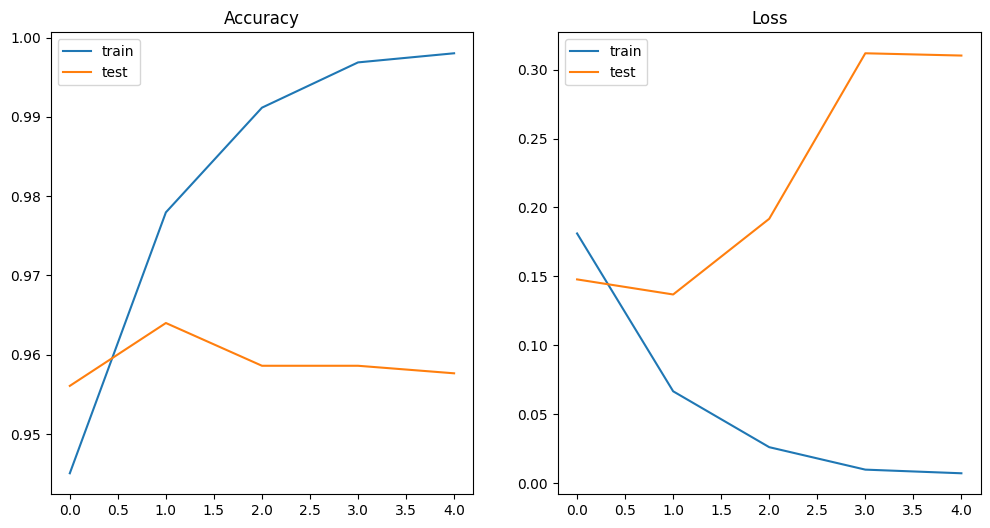

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='test')
plt.legend()
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.title('Loss')
plt.show()

In [ ]:
report1 = classification_report(y_test, model2.predict(x_test_bad) > 0.5)
print(report)

198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5864
           1       0.80      0.54      0.64       443

    accuracy                           0.96      6307
   macro avg       0.88      0.76      0.81      6307
weighted avg       0.95      0.96      0.95      6307



In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
vocab_size = len(tokenizer.word_index) +1

x_train_bad = tokenizer.texts_to_sequences(x_train)
x_test_bad = tokenizer.texts_to_sequences(x_test)

max_len = 70
x_train_bad = pad_sequences(x_train_bad, maxlen=max_len)
x_test_bad = pad_sequences(x_test_bad, maxlen=max_len)

emdedding_layer = Embedding(input_dim=vocab_size, output_dim=100, input_length=max_len)

model2 = Sequential([
    emdedding_layer,
    SimpleRNN(32),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history2 = model2.fit(x_train_bad, y_train, epochs=10, batch_size=32, validation_data=(x_test_bad, y_test))

Epoch 1/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9217 - loss: 0.2660 - val_accuracy: 0.9600 - val_loss: 0.1211
Epoch 2/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9846 - loss: 0.0581 - val_accuracy: 0.9624 - val_loss: 0.1478
Epoch 3/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9979 - loss: 0.0109 - val_accuracy: 0.9548 - val_loss: 0.1961
Epoch 4/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9990 - loss: 0.0045 - val_accuracy: 0.9602 - val_loss: 0.2542
Epoch 5/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.9573 - val_loss: 0.2714
Epoch 6/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9996 - loss: 0.0020 - val_accuracy: 0.9596 - val_loss: 0.2895
Epoch 7/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9992 - loss: 0.0031 - val_accuracy: 0.9499 - val_loss: 0.5823
Epoch 8/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9954 - loss: 0.0149 - val_accuracy

####RNN bidrictional

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
from keras.layers import Bidirectional

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
vocab_size = len(tokenizer.word_index) + 1

x_train_bad = tokenizer.texts_to_sequences(x_train)
x_test_bad = tokenizer.texts_to_sequences(x_test)

max_len = 100
x_train_bad = pad_sequences(x_train_bad, maxlen=max_len)
x_test_bad = pad_sequences(x_test_bad, maxlen=max_len)

emdedding_layer = Embedding(input_dim=vocab_size, output_dim=50, input_length=max_len)

earlystop = EarlyStopping(monitor='val_loss', patience=2, verbose=1, restore_best_weights=True)
model4 = Sequential([
    emdedding_layer,
    Bidirectional(SimpleRNN(16)),  # Wrapped with Bidirectional
    Dense(8, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history4 = model4.fit(x_train_bad, y_train, epochs=5, batch_size=32, validation_data=(x_test_bad, y_test))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


789/789 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9184 - loss: 0.3123 - val_accuracy: 0.9559 - val_loss: 0.1388
Epoch 2/5
789/789 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9710 - loss: 0.1019 - val_accuracy: 0.9604 - val_loss: 0.1293
Epoch 3/5
789/789 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9928 - loss: 0.0290 - val_accuracy: 0.9569 - val_loss: 0.1795
Epoch 4/5
789/789 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9972 - loss: 0.0131 - val_accuracy: 0.9507 - val_loss: 0.2386
Epoch 5/5
789/789 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9973 - loss: 0.0077 - val_accuracy: 0.9581 - val_loss: 0.2761


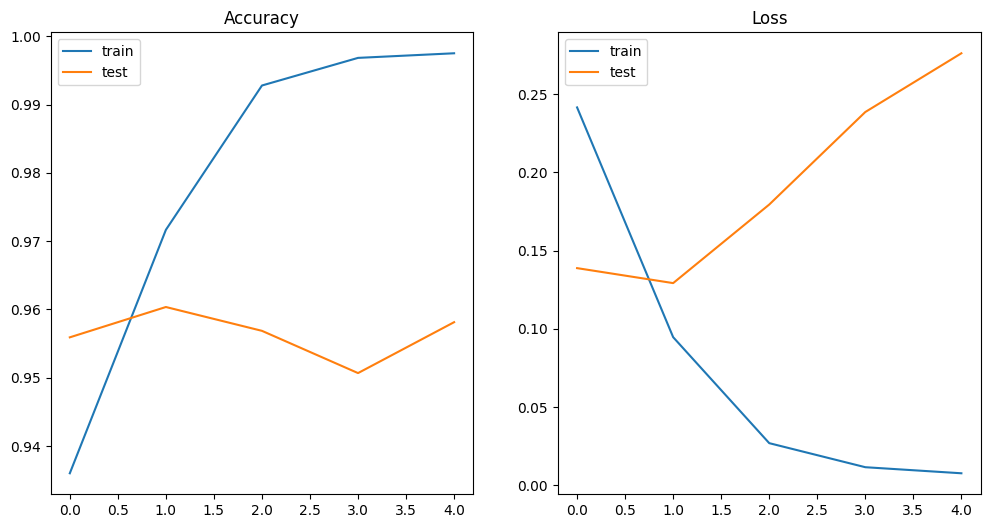

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history4.history['accuracy'], label='train')
plt.plot(history4.history['val_accuracy'], label='test')
plt.legend()
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history4.history['loss'], label='train')
plt.plot(history4.history['val_loss'], label='test')
plt.legend()
plt.title('Loss')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, model4.predict(x_test_bad) > 0.5)
print(report)

198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5864
           1       0.80      0.54      0.64       443

    accuracy                           0.96      6307
   macro avg       0.88      0.76      0.81      6307
weighted avg       0.95      0.96      0.95      6307



###ANN with BOW

In [ ]:
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from tkinter.constants import E
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(35881,)),  # Input shape matches GloVe vector size (100)
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])
earlystop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Train the model
history3 = model3.fit(
    x_train_bow, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test_bow, y_test),
    verbose=1
)


Epoch 1/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 73s 180ms/step - accuracy: 0.8968 - loss: 0.4129 - val_accuracy: 0.9580 - val_loss: 0.1384
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9695 - loss: 0.0956 - val_accuracy: 0.9638 - val_loss: 0.1128
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9869 - loss: 0.0449 - val_accuracy: 0.9650 - val_loss: 0.1131
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9936 - loss: 0.0257 - val_accuracy: 0.9654 - val_loss: 0.1169
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9961 - loss: 0.0172 - val_accuracy: 0.9638 - val_loss: 0.1218
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9975 - loss: 0.0111 - val_accuracy: 0.9623 - val_loss: 0.1295
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9978 - loss: 0.0089 - val_accuracy: 0.9615 - val_loss: 0.1377
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9988 - loss: 0.0058 - val_

In [ ]:
import matplotlib.pyplot as plt

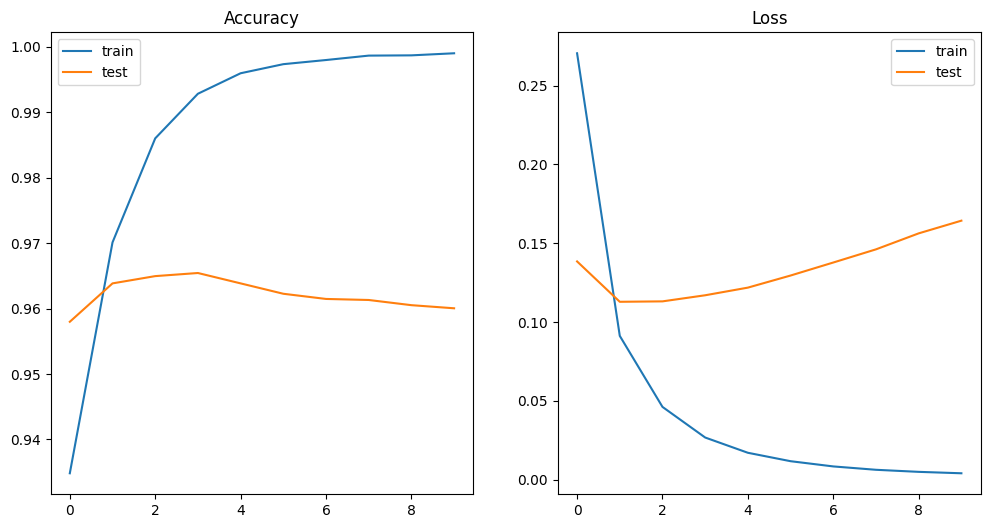

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='train')
plt.plot(history3.history['val_accuracy'], label='test')
plt.legend()
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='test')
plt.legend()
plt.title('Loss')
plt.show()

In [ ]:
report = classification_report(y_test, model3.predict(x_test_bow) > 0.5)
print(report)

198/198 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5864
           1       0.78      0.60      0.68       443

    accuracy                           0.96      6307
   macro avg       0.88      0.79      0.83      6307
weighted avg       0.96      0.96      0.96      6307



In [ ]:
y_pred = model3.predict(x_test_bow) > 0.5
calculated_f1_score = f1_score(y_test, y_pred, average='macro')
print(calculated_f1_score)

198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
0.8294470327360948


###GRU

In [ ]:
from keras.layers import GRU

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
vocab_size = len(tokenizer.word_index) + 1

x_train_bad = tokenizer.texts_to_sequences(x_train)
x_test_bad = tokenizer.texts_to_sequences(x_test)

max_len = 100
x_train_bad = pad_sequences(x_train_bad, maxlen=max_len)
x_test_bad = pad_sequences(x_test_bad, maxlen=max_len)

emdedding_layer = Embedding(input_dim=vocab_size, output_dim=50, input_length=max_len)

earlystop = EarlyStopping(monitor='val_loss', patience=2, verbose=1, restore_best_weights=True)
model5 = Sequential([
    emdedding_layer,
    (GRU(32)),  # Wrapped with Bidirectional
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model5.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history5 = model4.fit(x_train_bad, y_train, epochs=10, batch_size=32, validation_data=(x_test_bad, y_test))

Epoch 1/10
 11/789 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 1.0000 - loss: 0.0021

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


789/789 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9994 - loss: 0.0035 - val_accuracy: 0.9561 - val_loss: 0.5071
Epoch 2/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9996 - loss: 0.0024 - val_accuracy: 0.9531 - val_loss: 0.5363
Epoch 3/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9995 - loss: 0.0028 - val_accuracy: 0.9551 - val_loss: 0.5185
Epoch 4/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9996 - loss: 0.0024 - val_accuracy: 0.9547 - val_loss: 0.5236
Epoch 5/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9998 - loss: 0.0015 - val_accuracy: 0.9526 - val_loss: 0.5891
Epoch 6/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9543 - val_loss: 0.5792
Epoch 7/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9997 - loss: 0.0015 - val_accuracy: 0.9531 - val_loss: 0.6035
Epoch 8/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9999 - loss: 9.7250e-04 - val_accuracy

In [ ]:
report = classification_report(y_test, model5.predict(x_test_bad) > 0.5)
print(report)

198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.92      0.48      0.63      5864
           1       0.07      0.48      0.11       443

    accuracy                           0.48      6307
   macro avg       0.49      0.48      0.37      6307
weighted avg       0.86      0.48      0.60      6307



####GRU with bidrictional

In [ ]:
from keras.layers import Bidirectional

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
vocab_size = len(tokenizer.word_index) + 1

x_train_bad = tokenizer.texts_to_sequences(x_train)
x_test_bad = tokenizer.texts_to_sequences(x_test)

max_len = 100
x_train_bad = pad_sequences(x_train_bad, maxlen=max_len)
x_test_bad = pad_sequences(x_test_bad, maxlen=max_len)

emdedding_layer = Embedding(input_dim=vocab_size, output_dim=50, input_length=max_len)

earlystop = EarlyStopping(monitor='val_loss', patience=2, verbose=1, restore_best_weights=True)
model6 = Sequential([
    emdedding_layer,
    Bidirectional(GRU(16)),  # Wrapped with Bidirectional
    Dense(8, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model6.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history6 = model6.fit(x_train_bad, y_train, epochs=5, batch_size=32, validation_data=(x_test_bad, y_test))

Epoch 1/5
789/789 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9229 - loss: 0.2693 - val_accuracy: 0.9619 - val_loss: 0.1171
Epoch 2/5
789/789 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9682 - loss: 0.0778 - val_accuracy: 0.9631 - val_loss: 0.1245
Epoch 3/5
789/789 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9737 - loss: 0.0446 - val_accuracy: 0.9616 - val_loss: 0.1769
Epoch 4/5
789/789 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9840 - loss: 0.0316 - val_accuracy: 0.9619 - val_loss: 0.2278
Epoch 5/5
789/789 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9913 - loss: 0.0240 - val_accuracy: 0.9575 - val_loss: 0.2679


In [ ]:
report = classification_report(y_test, model6.predict(x_test_bad) > 0.5)
print(report)

198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5864
           1       0.80      0.59      0.68       443

    accuracy                           0.96      6307
   macro avg       0.88      0.79      0.83      6307
weighted avg       0.96      0.96      0.96      6307



In [ ]:
y_pred = model6.predict(x_test_bad) > 0.5
calculated_f1_score = f1_score(y_test, y_pred, average='macro')
print(calculated_f1_score)

198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
0.8305923848376678


###LSTM

In [ ]:
from keras.layers import LSTM

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
vocab_size = len(tokenizer.word_index) + 1

x_train_bad = tokenizer.texts_to_sequences(x_train)
x_test_bad = tokenizer.texts_to_sequences(x_test)

max_len = 50
x_train_bad = pad_sequences(x_train_bad, maxlen=max_len)
x_test_bad = pad_sequences(x_test_bad, maxlen=max_len)

emdedding_layer = Embedding(input_dim=vocab_size, output_dim=100, input_length=max_len)

earlystop = EarlyStopping(monitor='val_loss', patience=2, verbose=1, restore_best_weights=True)
model7 = Sequential([
    emdedding_layer,
    (LSTM(32)),  # Wrapped with Bidirectional
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model7.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history7 = model7.fit(x_train_bad, y_train, epochs=10, batch_size=32, validation_data=(x_test_bad, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


789/789 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9267 - loss: 0.2723 - val_accuracy: 0.9626 - val_loss: 0.1167
Epoch 2/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9822 - loss: 0.0656 - val_accuracy: 0.9651 - val_loss: 0.1363
Epoch 3/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9938 - loss: 0.0219 - val_accuracy: 0.9621 - val_loss: 0.1887
Epoch 4/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9977 - loss: 0.0100 - val_accuracy: 0.9562 - val_loss: 0.1950
Epoch 5/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9986 - loss: 0.0063 - val_accuracy: 0.9619 - val_loss: 0.2846
Epoch 6/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9992 - loss: 0.0039 - val_accuracy: 0.9619 - val_loss: 0.3057
Epoch 7/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9994 - loss: 0.0020 - val_accuracy: 0.9575 - val_loss: 0.3226
Epoch 8/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9996 - loss: 0.0020 - val_accuracy: 0.960

In [ ]:
report = classification_report(y_test, model7.predict(x_test_bad) > 0.5)
print(report)

198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5864
           1       0.71      0.65      0.68       443

    accuracy                           0.96      6307
   macro avg       0.84      0.82      0.83      6307
weighted avg       0.96      0.96      0.96      6307



In [ ]:
y_pred = model7.predict(x_test_bad) > 0.5
calculated_f1_score = f1_score(y_test, y_pred, average='macro')
print(calculated_f1_score)

198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
0.8279533249461551


#####try different parameters

In [ ]:
from keras.layers import LSTM

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
vocab_size = len(tokenizer.word_index) + 1

x_train_bad = tokenizer.texts_to_sequences(x_train)
x_test_bad = tokenizer.texts_to_sequences(x_test)

max_len = 50
x_train_bad = pad_sequences(x_train_bad, maxlen=max_len)
x_test_bad = pad_sequences(x_test_bad, maxlen=max_len)

emdedding_layer = Embedding(input_dim=20000, output_dim=50, input_length=max_len)

earlystop = EarlyStopping(monitor='val_loss', patience=2, verbose=1, restore_best_weights=True)
model8 = Sequential([
    emdedding_layer,
    (LSTM(32)),  # Wrapped with Bidirectional
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model8.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history8 = model8.fit(x_train_bad, y_train, epochs=10, batch_size=32, validation_data=(x_test_bad, y_test))

Epoch 1/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9268 - loss: 0.2636 - val_accuracy: 0.9623 - val_loss: 0.1143
Epoch 2/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9773 - loss: 0.0728 - val_accuracy: 0.9637 - val_loss: 0.1200
Epoch 3/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9873 - loss: 0.0377 - val_accuracy: 0.9634 - val_loss: 0.1256
Epoch 4/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9920 - loss: 0.0257 - val_accuracy: 0.9629 - val_loss: 0.1744
Epoch 5/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9959 - loss: 0.0144 - val_accuracy: 0.9612 - val_loss: 0.1919
Epoch 6/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9970 - loss: 0.0104 - val_accuracy: 0.9618 - val_loss: 0.2753
Epoch 7/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9977 - loss: 0.0076 - val_accuracy: 0.9604 - val_loss: 0.2509
Epoch 8/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9981 - loss: 0.0064 - val_accuracy

In [ ]:
report = classification_report(y_test, model8.predict(x_test_bad) > 0.5)
print(report)

198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5864
           1       0.76      0.61      0.68       443

    accuracy                           0.96      6307
   macro avg       0.87      0.80      0.83      6307
weighted avg       0.96      0.96      0.96      6307



#####LSTM with bidirectional

In [ ]:
from keras.layers import LSTM

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
vocab_size = len(tokenizer.word_index) + 1

x_train_bad = tokenizer.texts_to_sequences(x_train)
x_test_bad = tokenizer.texts_to_sequences(x_test)

max_len = 50
x_train_bad = pad_sequences(x_train_bad, maxlen=max_len)
x_test_bad = pad_sequences(x_test_bad, maxlen=max_len)

emdedding_layer = Embedding(input_dim=30000, output_dim=50, input_length=max_len)

earlystop = EarlyStopping(monitor='val_loss', patience=2, verbose=1, restore_best_weights=True)
model9 = Sequential([
    emdedding_layer,
    Bidirectional((LSTM(64))),  # Wrapped with Bidirectional
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model9.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history9 = model9.fit(x_train_bad, y_train, epochs=10, batch_size=32, validation_data=(x_test_bad, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


789/789 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9303 - loss: 0.2273 - val_accuracy: 0.9610 - val_loss: 0.1134
Epoch 2/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9775 - loss: 0.0667 - val_accuracy: 0.9631 - val_loss: 0.1367
Epoch 3/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9904 - loss: 0.0312 - val_accuracy: 0.9624 - val_loss: 0.1377
Epoch 4/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9943 - loss: 0.0193 - val_accuracy: 0.9613 - val_loss: 0.1933
Epoch 5/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9962 - loss: 0.0106 - val_accuracy: 0.9586 - val_loss: 0.2251
Epoch 6/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9987 - loss: 0.0057 - val_accuracy: 0.9580 - val_loss: 0.2423
Epoch 7/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9986 - loss: 0.0047 - val_accuracy: 0.9564 - val_loss: 0.2734
Epoch 8/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9989 - loss: 0.0038 - val_accuracy: 0

In [ ]:
report = classification_report(y_test, model9.predict(x_test_bad) > 0.5)
print(report)

198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5864
           1       0.75      0.59      0.66       443

    accuracy                           0.96      6307
   macro avg       0.86      0.79      0.82      6307
weighted avg       0.95      0.96      0.95      6307



In [ ]:
y_pred = model9.predict(x_test_bad) > 0.5
calculated_f1_score = f1_score(y_test, y_pred, average='macro')
print(calculated_f1_score)

198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
0.817907002898518


#####LSTM with class weighted

In [ ]:
from keras.callbacks import EarlyStopping
from keras.layers import LSTM, Bidirectional
from sklearn.utils.class_weight import compute_class_weight

# Tokenization and Padding
tokenizer = Tokenizer(num_words=30000)  # Limit vocab to top 30,000 words
tokenizer.fit_on_texts(x_train)
vocab_size = len(tokenizer.word_index) + 1

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

max_len = 50  # Truncate/pad sequences to this length
x_train_pad = pad_sequences(x_train_seq, maxlen=max_len, padding='post', truncating='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=max_len, padding='post', truncating='post')

# Class Weighting (for imbalanced data)
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
print("Class Weights:", class_weights_dict)

# Model Architecture
embedding_dim = 50
model10 = Sequential([
    Embedding(input_dim=30000, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2)),  # Bidirectional LSTM with dropout
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

# Compile
model10.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Early Stopping
earlystop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    verbose=1,
    restore_best_weights=True
)

# Train
history10 = model10.fit(
    x_train_pad,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test_pad, y_test),
    class_weight=class_weights_dict,
    callbacks=[earlystop]
)

Class Weights: {0: np.float64(0.5377270014493989), 1: np.float64(7.126553672316384)}
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


789/789 ━━━━━━━━━━━━━━━━━━━━ 255s 315ms/step - accuracy: 0.7031 - loss: 0.5362 - val_accuracy: 0.9312 - val_loss: 0.2020
Epoch 2/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 260s 311ms/step - accuracy: 0.9391 - loss: 0.1722 - val_accuracy: 0.9331 - val_loss: 0.1689
Epoch 3/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 270s 322ms/step - accuracy: 0.9769 - loss: 0.0713 - val_accuracy: 0.9597 - val_loss: 0.1330
Epoch 4/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 254s 311ms/step - accuracy: 0.9881 - loss: 0.0383 - val_accuracy: 0.9443 - val_loss: 0.1848
Epoch 5/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 272s 324ms/step - accuracy: 0.9891 - loss: 0.0296 - val_accuracy: 0.9423 - val_loss: 0.2102
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 3.


In [ ]:
report = classification_report(y_test, model10.predict(x_test_pad) > 0.5)
print(report)

198/198 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5864
           1       0.64      0.75      0.69       443

    accuracy                           0.95      6307
   macro avg       0.81      0.86      0.83      6307
weighted avg       0.96      0.95      0.95      6307



In [ ]:
y_pred = model10.predict(x_test_pad) > 0.5
calculated_f1_score = f1_score(y_test, y_pred, average='macro')
print(calculated_f1_score)

198/198 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step
0.8474209016043693


# f1_score

##after traing apove i selected the best scores from classification matrices to compare it so if you want to see all tries you can see it apove

In [ ]:
###RNN evaluation
y_pred = model.predict(x_test_bad) > 0.5
calculated_f1_score = f1_score(y_test, y_pred, average='macro')
print(calculated_f1_score)

198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
0.7933319502712174


In [ ]:
###RNN bidrectional evaluation
y_pred = model4.predict(x_test_bad) > 0.5
calculated_f1_score = f1_score(y_test, y_pred, average='macro')
print(calculated_f1_score)

198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
0.8203641456582633


In [ ]:
###ANN with BOW evaluation
y_pred = model3.predict(x_test_bow) > 0.5
calculated_f1_score = f1_score(y_test, y_pred, average='macro')
print(calculated_f1_score)

198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
0.8294470327360948


In [ ]:
###GRU
y_pred = model5.predict(x_test_bad) > 0.5
calculated_f1_score = f1_score(y_test, y_pred, average='macro')
print(calculated_f1_score)

198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
0.49409398084747363


In [ ]:
###GRU bidrectional
y_pred = model6.predict(x_test_bad) > 0.5
calculated_f1_score = f1_score(y_test, y_pred, average='macro')
print(calculated_f1_score)

198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
0.8305923848376678


In [ ]:
###LSTM
y_pred = model7.predict(x_test_bad) > 0.5
calculated_f1_score = f1_score(y_test, y_pred, average='macro')
print(calculated_f1_score)

198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
0.8279533249461551


In [ ]:
###LSTM bidrectional
y_pred = model9.predict(x_test_bad) > 0.5
calculated_f1_score = f1_score(y_test, y_pred, average='macro')
print(calculated_f1_score)

198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
0.817907002898518


In [ ]:
### biderictional LSTM with class weighted
y_pred = model10.predict(x_test_pad) > 0.5
calculated_f1_score = f1_score(y_test, y_pred, average='macro')
print(calculated_f1_score)

198/198 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step
0.8474209016043693


so now i can select biderctional LSTM with classwight

comparing with normal ML algorithems which the best one is (82%) it is clear that NNs specially LSTM and bidirectionals is better

In [ ]:
def classify_custom_tweet(tweet_text):
    # Clean the tweet using your function
    cleaned_tweet = clean_tweet(tweet_text)

    # Convert text to sequence using your trained tokenizer
    sequence = tokenizer.texts_to_sequences([cleaned_tweet])

    # Pad the sequence (exactly like training)
    padded_sequence = pad_sequences(sequence, maxlen=50, padding='post', truncating='post')

    # Make prediction
    prediction = model10.predict(padded_sequence, verbose=0)[0][0]
    sentiment = "Negative" if prediction >= 0.5 else "Positive"  # Assuming 1=Negative, 0=Positive

    return {
        "cleaned_text": cleaned_tweet,
        "probability": float(prediction),
        "sentiment": sentiment
    }

In [ ]:
input = "I hate you"
result = classify_custom_tweet(input)
print(f"Original Tweet:",input)
print(f"Cleaned Version: {result['cleaned_text']}")
print(f"Predicted Sentiment: {result['sentiment']} (Confidence: {result['probability']:.4f})")

Original Tweet: I hate you
Cleaned Version: hate
Predicted Sentiment: Negative (Confidence: 0.6281)
